## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_df = pd.DataFrame(merge_data)
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = mouse_df["Mouse ID"].nunique()
unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_df["Mouse ID"].value_counts()
duplicate_mice

g989    13
s185    10
a401    10
a897    10
m269    10
        ..
x336     1
d133     1
x226     1
h428     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_df.drop_duplicates(subset=["Mouse ID"], keep="last")
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tumor_mean = clean_data["Tumor Volume (mm3)"].mean()
tumor_median = clean_data["Tumor Volume (mm3)"].median()
tumor_var = clean_data["Tumor Volume (mm3)"].var()
tumor_std = clean_data["Tumor Volume (mm3)"].std()
tumor_sem = clean_data["Tumor Volume (mm3)"].sem()


tumor_summary = [{"Tumor Mean": tumor_mean,
                "Tumor Median": tumor_median,
                "Tumor Variance": tumor_var,
                "Tumor STD": tumor_std,
                "Tumor SEM": tumor_sem 
                        }]
tumor_summary_df = pd.DataFrame(tumor_summary)
tumor_summary_df


# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
0,54.999137,55.84141,160.151054,12.65508,0.801983


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
drug_group = clean_data.groupby("Drug Regimen")

mean_volume_by_drug = drug_group["Tumor Volume (mm3)"].mean()
median_volume_by_drug = drug_group["Tumor Volume (mm3)"].median()
var_volume_by_drug = drug_group["Tumor Volume (mm3)"].var()
std_volume_by_drug = drug_group["Tumor Volume (mm3)"].std()
sem_volume_by_drug = drug_group["Tumor Volume (mm3)"].sem()

drug_summary_df = pd.DataFrame({"Tumor Mean": mean_volume_by_drug,
                "Tumor Median": median_volume_by_drug,
                "Tumor Variance": var_volume_by_drug,
                "Tumor STD": std_volume_by_drug,
                "Tumor SEM": sem_volume_by_drug 
                        })

drug_summary_df

# drug_group.head()

# volume_by_drug_df = pd.DataFrame("tumor_volume_by_drug")
# This method produces everything in a single groupby function


,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

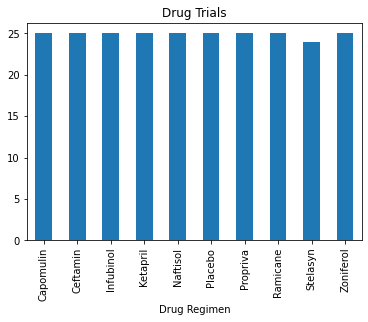

In [9]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 
mice_per_drug = drug_group["Mouse ID"].count()
by_drug = mice_per_drug.plot.bar(x="Drug Regimen", y="Mouse ID", title="Drug Trials")

index = "Drug Regimen"

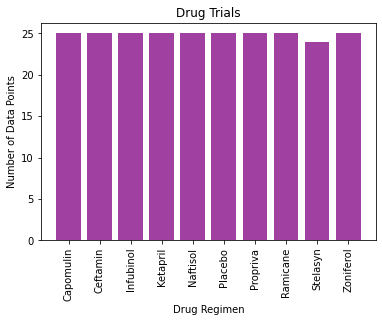

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pyplot.
by_drug_df = pd.DataFrame(mice_per_drug)
new_by_drug = by_drug_df.rename(columns = {"Mouse ID": "Mice Tested"})

y_axis = new_by_drug["Mice Tested"]
x_axis = new_by_drug.index
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color="purple", alpha=0.75, align="center")
plt.xticks(tick_locations, rotation="vertical")

plt.title("Drug Trials")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()
# x_axis = drug_group["Drug Regimen"]

# plt.bar(x_axis, y_axis)

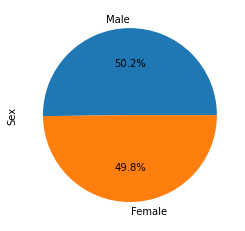

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = clean_data["Sex"].value_counts()
genders.plot.pie(autopct="%1.1f%%")

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


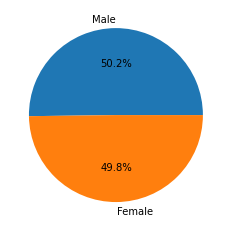

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders_df = pd.DataFrame(genders)
genders_df
labels = genders_df.index
plt.pie(genders_df, labels=labels, autopct="%1.1f%%")
plt.title = "Sex"
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = clean_data.loc[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatments

# Start by getting the last (greatest) timepoint for each mouse
max_time = mouse_df.groupby("Mouse ID")["Timepoint"].max()
max_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge = treatments.merge(max_time, how="inner", on=["Mouse ID", "Timepoint"])
merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_ls = [("Capomulin", "Ramicane", "Infubinol", "Ceftamin")]
    

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merge["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = merge.loc[merge["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ramicane = merge.loc[merge["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
infubinol = merge.loc[merge["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
ceftamin = merge.loc[merge["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]

# add subset 
tumors = [capomulin, ramicane, infubinol, ceftamin]
tumors
# Determine outliers using upper and lower bounds
lbound = quartiles[0.25] - 1.5 * iqr
ubound = quartiles[0.75] + 1.5 * iqr

merge.loc[(merge["Tumor Volume (mm3)"] < lbound) | (merge["Tumor Volume (mm3)"] > ubound)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


Text(0, 0.5, 'Final Tumor Volume (mm3)')

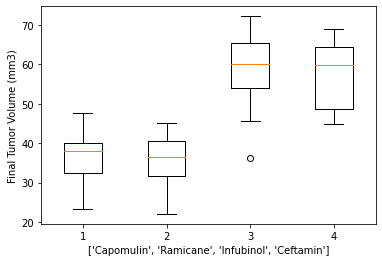

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumors)
x_ticks = treatment_ls
plt.xlabel(x_ticks)
plt.ylabel("Final Tumor Volume (mm3)")

# plt.xticks(x_ticks)
# plt.xticks("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

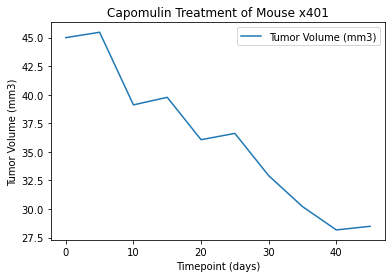

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
test_mouse = mouse_df.loc[mouse_df["Mouse ID"]=="x401"]

capomulin = merge.loc[merge["Drug Regimen"]=="Capomulin"]
avg_tumor = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = clean_data[["Mouse ID", "Weight (g)"]]

weight_tumor_df = pd.merge(weight, avg_tumor, how="right", on="Mouse ID")
weight_tumor_df

test_mouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin Treatment of Mouse x401")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

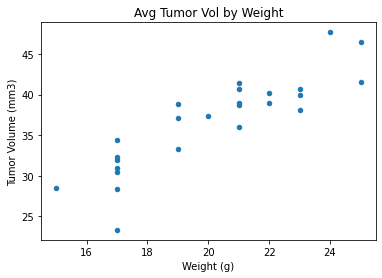

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_tumor_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Avg Tumor Vol by Weight")

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = weight_tumor_df["Weight (g)"]
y = weight_tumor_df["Tumor Volume (mm3)"]

model = np.polyfit(x, y, 1)
model

y = 1.75046823*x + 1.44814695

Text(20, 32, 'R-squared: 0.9999999999999998')

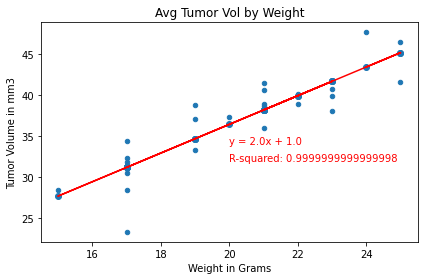

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
slope, intercept

predict = x*slope + intercept
predict

# predict = np.poly1d(model)

weight_tumor_df.plot(kind="scatter", x="Weight (g)", y= "Tumor Volume (mm3)", title="Avg Tumor Vol by Weight")

plt.scatter(x, y)
plt.plot(x, predict, color="red")
plt.xlabel("Weight in Grams")
plt.ylabel("Tumor Volume in mm3")
plt.tight_layout()

line_eq = f"y = {round(slope)}x + {round(intercept)}"
r_val = pearsonr(x, y)[0]
r_sq =  r_val ** 2

plt.annotate(line_eq, (20,34), color="red")
plt.annotate(f"R-squared: {r_sq}", (20,32), color="red")

# x_lin_reg = range(14, 27)
# y_lin_reg = predict(x_lin_reg)
# plt.plot(x_lin_reg, y_lin_reg, c = 'r')
